# Instacart Data Analysis Project

Introduction:
    
    Brief Description - This project involves analyzing the Instacart dataset to gain insights into customers'    shopping patterns.
    
    Goal of the Project - The goal of this project is to clean and preprocess the data for further analysis,    identify duplicates, and ensure data integrity. We aim to provide insights into customer ordering behavior  and patterns.
    
    Description of Data - We are using 5 datasets in this analysis
        
        1. instacart_orders.csv: Contains information about orders placed by customers
        2. products.csv: Contains details about products available in the store
        3. departments.csv: Contains information about different departments in the store
        4. aisles.csv: Contains details about various aisles in the store
        5. order_products.csv: Contains information about products involved in each orders    
        

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
orders = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project2/instacart_orders.csv', sep=';')

products = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project2/products.csv', sep=";")

departments = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project2/departments.csv', sep=";")

aisles = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project2/aisles.csv', sep=";")

order_products = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project2/order_products.csv', sep=";")

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
orders['days_since_prior_order'].sort_values().unique() #i want to see if i can convert the last column [5] to int64 so i will check for unique values in instacart_orders

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., nan])

In [6]:
orders['days_since_prior_order'].isna().sum() #added up the total amount of NaN values in the df to see how many NaNs will be converted to Int64


28819

In [7]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype('Int64') #i took the column days_since_prior_order in instacart_orders and converted all the NaNs in the column to Int64
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478967 non-null  int64
 1   user_id                 478967 non-null  int64
 2   order_number            478967 non-null  int64
 3   order_dow               478967 non-null  int64
 4   order_hour_of_day       478967 non-null  int64
 5   days_since_prior_order  450148 non-null  Int64
dtypes: Int64(1), int64(5)
memory usage: 22.4 MB


In [8]:
orders['days_since_prior_order'].dtype #here i checked the column for datatype to make sure my conversion took

Int64Dtype()

In [9]:
orders.duplicated().sum() #here i discovered how many duplicate rows are contained within my df

15

In [10]:
unique_orders = orders.drop_duplicates() # i created a variable to assign the unique rows, i dropped all 15 of the duplicate ones

In [11]:
unique_orders.info() #called the info again to see if it worked and it did

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  450135 non-null  Int64
dtypes: Int64(1), int64(5)
memory usage: 26.0 MB


In summary, I noticed that the columns in days_since_prior_order had the dtype of float64, so I changed the dtype of those to Int64 using the astype() method. I then identified duplicated values in the df by using isna().sum(). I created a unique variable for the df and dropped all duplicates using drop_duplicates().

In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
products.isna().sum() #searched for the NaN values in the df they are all in the product_name column

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [14]:
products.duplicated().sum() #searched for duplicated rows in the df, came back with none

0

In [15]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [16]:
departments.isna().sum() #checked to see if there were any NaN values, there aren't any

department_id    0
department       0
dtype: int64

In [17]:
departments.duplicated().sum() #checked for any duplicate rows, there aren't any

0

In [18]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [19]:
aisles.isna().sum() #checked for any NaN values in the df, there aren't any

aisle_id    0
aisle       0
dtype: int64

In [20]:
aisles.duplicated().sum() #checked for any duplicate rows, there aren't any

0

In [21]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [22]:
order_products.isna().sum() #checked the df for NaN values, found some so now i will fill it with 0s

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [23]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('Int64') #i took the 'add_to_cart_order' column and changed it from float64 to Int64 so that i can manipulate the data in this column
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4544171 non-null  Int64
 3   reordered          4545007 non-null  int64
dtypes: Int64(1), int64(3)
memory usage: 143.0 MB


In [24]:
order_products.duplicated().sum() #checked for duplicated rows and found none

0

In summary, I looked at the remainder of the datasets. In the products.csv, I called info() on the df to see what types of data are in each column. I noticed that the product_name column had missing values so I searched its column to find any NaN values. I used isna().sum() to find out that information. I then took the duplicated().sum() method to see if there were any duplicated rows and no duplicated rows were returned. I did the same thing for the departments.csv and the same thing for aisles.csv and had no issues. I performed the same method on the order_products.csv and had similar issues like in the instacart_orders.csv. So I used .isna().sum() to sum all of the NaN values in each column of the df and was shown that I had NaN values in add_to_cart_order column. I then converted those NaN values to 'Int64' using astype() method. I also checked for duplicate rows in the df and none were returned. 

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [25]:
# Check for duplicated orders
orders.duplicated().sum() #used duplicated().sum() method to find all the duplicate orders and add them together for me


15

In [26]:
orders.head(10) #printed to see a table of the df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30
1,1690866,163593,5,5,12,9
2,1454967,39980,4,5,19,2
3,1768857,82516,56,0,20,10
4,3007858,196724,2,4,12,17
5,1843871,20084,5,0,11,15
6,2511640,148233,40,3,8,2
7,2521283,97711,2,0,18,22
8,2266494,34954,40,5,15,4
9,446014,15356,2,4,8,10


In [27]:
# Check for all orders placed Wednesday at 2:00 AM
filtered_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
#i setup a variable and set it equal to some booleans. So first boolean said return if equals to 3 which is Wednesday AND return if equals to 2 which is 2:00am. if those two parameters are met i should get values returned to me
filtered_orders


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16
5156,2190225,138285,18,3,2,11
15506,553049,58599,13,3,2,7
18420,382357,120200,19,3,2,11
24691,690242,77357,2,3,2,9
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30
458816,910166,164782,18,3,2,4
459635,1680532,106435,6,3,2,21
468324,222962,54979,59,3,2,3


In [28]:
# Remove duplicate orders
filtered_orders.duplicated().sum() #i checked for duplicated rows and found that there are 15 of them
filtered_orders = filtered_orders.drop_duplicates() #i set a variable for the cleaned up df that has duplicates dropped 
filtered_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16
5156,2190225,138285,18,3,2,11
15506,553049,58599,13,3,2,7
18420,382357,120200,19,3,2,11
24691,690242,77357,2,3,2,9
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30
458816,910166,164782,18,3,2,4
459635,1680532,106435,6,3,2,21
468324,222962,54979,59,3,2,3


In [29]:
# Double check for duplicate rows
filtered_orders.duplicated().sum() #i called that df to look at the number of duplicates that were returned, no duplicates returned

0

In [30]:
# Double check for duplicate order IDs only
filtered_orders['order_id'].duplicated().sum() # i looked at the number of duplicated IDs in order_id, there were none returned

0

### `products` data frame

In [31]:
# Check for fully duplicate rows
products.duplicated().sum() #used the duplicated().sum() method to find and add up all the duplicated rows, there were none


0

In [32]:
# Check for just duplicate product IDs

products['product_id'].duplicated().sum() #added all of the duplicates in the product_id column using duplicated().sum(), there were non

0

In [33]:
products.sample(10) #got a view of the table

,product_id,product_name,aisle_id,department_id
46669,46670,Vegenaise Soy-Free,72,13
37118,37119,Uncured Pepperoni,96,20
43850,43851,Rolo Ice Cream,37,1
28989,28990,Curly Parsley Bunch,16,4
11169,11170,Sweetened Multi-Grain Cereal,121,14
7740,7741,Chipotle Peppers In Adobo Sauce,30,6
29543,29544,Cream Top Peach on the Bottom Yogurt,120,16
4984,4985,Homestyle Some Pulp Orange Juice,31,7
41111,41112,Brownie Bite Protein Bars,3,19
1558,1559,Cherry Pomegranate Greek Yogurt,120,16


In [34]:
# Check for duplicate product names that aren't missing (EXCLUDING NaN)
product_name_lower = products['product_name'].dropna().str.lower() #being that the characters were upper and lower I called on the lower() method to make all the characters lower to make names uniform so that I can look at all of the duplicated names with ease
product_name_lower.duplicated().sum() #this gave me the number of duplicate product names excluding NaN values

104

### `departments` data frame

In [35]:
departments.duplicated().sum() #checked for duplicates

0

In [36]:
departments.isna().sum() #since dataframe was small i checked for any NaN values using isna()

department_id    0
department       0
dtype: int64

### `aisles` data frame

In [37]:
aisles.duplicated().sum()

0

In [38]:
aisles.isna().sum() #checked for any NaN values in both

aisle_id    0
aisle       0
dtype: int64

### `order_products` data frame

In [39]:
# Check for fullly duplicate rows
fully_duplicated = order_products.duplicated().sum() #i checked here for any fully duplicated rows
fully_duplicated

0

In [40]:
# Double check for any other tricky duplicates
combo_duplicated = order_products.duplicated(subset=['order_id', 'product_id']).sum() #i created a variable to look at the combination of order_id and product_id to check any duplicates between the two, none were returned
combo_duplicated

0

In [41]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


## Find and remove missing values


### `products` data frame

In [42]:
products.sample(10)

,product_id,product_name,aisle_id,department_id
41495,41496,Redcurrant Jelly,88,13
29038,29039,Mocha Latte Ice Cream Bars,37,1
6861,6862,Soothing Hydro Serum Facial Mask,132,11
11266,11267,Suddenly Pasta Salad Creamy Italian,4,9
46288,46289,Fusion ProGlide Razor Handle with FlexBall Tec...,55,11
24999,25000,Whole Wheat Multigrain Pop Cakes,78,19
34818,34819,Liquid Vitamin C Orange Flavor,47,11
29008,29009,Organic Salted Pistachio,117,19
10340,10341,Organic Honey Green Tea Drink,94,7
37759,37760,Cherry Flavor Infants' Oral Suspension,6,2


In [43]:
products.isna().sum() #i checked for missing values like you stated. And found 1258 in the product_name section

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [44]:
nan_rows = products[products['product_name'].isna()] #i returned all rows that had NaN values in the product_name column
nan_rows

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [45]:
nan_dept_count = nan_rows['department_id'].value_counts() #i wanted to see if there was a particular department that had more NaN values than others. Dept 21 contains all of the NaN values
nan_dept_count


department_id
21    1258
Name: count, dtype: int64

In [46]:
count_100 = (products['aisle_id'] == 100).sum() #this code returned 1258 lines that contain the 100 aisle_id, so this tells me that all the NaN values are also in the same aisle
count_100

1258

In [47]:
# Are all of the missing product names associated with aisle ID 100?
aisle_id_100 = (products['aisle_id'] == 100).sum() #called boolean to see if true or false
aisle_id_100


1258

In [48]:
# Are all of the missing product names associated with department ID 21?
dept_id_21 = (products['department_id'] == 21).sum() #called boolean to see if true or false
dept_id_21


1258

In [49]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [50]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [51]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [52]:
merged_product_aisle = products.merge(aisles, on='aisle_id', how='left') #i merged products with aisles df on the aisle_id
merged_product_aisle

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,2,All-Seasons Salt,104,13,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,energy sports drinks
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,hot cereal pancake mixes
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,hot cereal pancake mixes
49692,49693,SPRING WATER BODY WASH,127,11,body lotions soap


In [53]:
merged_df = merged_product_aisle.merge(departments, on='department_id', how='left') #i merged the df above with departments on the dept_id so that I can access all of the information for the next task
merged_df

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,energy sports drinks,beverages
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,hot cereal pancake mixes,breakfast
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,hot cereal pancake mixes,breakfast
49692,49693,SPRING WATER BODY WASH,127,11,body lotions soap,personal care


In [54]:
merged_df[(merged_df['aisle_id'] == 100) & (merged_df['department_id'] == 21)] #i wanted to return the aisle_id = 100 and department_id = 21 so that i can get the name of the department. It returned 'missing'

,product_id,product_name,aisle_id,department_id,aisle,department
37,38,NaN,100,21,missing,missing
71,72,NaN,100,21,missing,missing
109,110,NaN,100,21,missing,missing
296,297,NaN,100,21,missing,missing
416,417,NaN,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,NaN,100,21,missing,missing
49574,49575,NaN,100,21,missing,missing
49640,49641,NaN,100,21,missing,missing
49663,49664,NaN,100,21,missing,missing


In [55]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True) #this method filled all missing product name values with 'Unknown'
products.head(10)

/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_82094/3219752917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_name'].fillna('Unknown', inplace=True) #this method filled all missing product name values with 'Unknown'


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [56]:
products['product_name'].isna().sum() #checked for NaN values in the product_name column

0

In [57]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### `orders` data frame

In [58]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30
1,1690866,163593,5,5,12,9
2,1454967,39980,4,5,19,2
3,1768857,82516,56,0,20,10
4,3007858,196724,2,4,12,17


In [59]:
orders.isna().sum() #checked for missing values and 5 were returned in the 

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [60]:
# Are there any missing values where it's not a customer's first order?
missing_not_first = orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)] #filtered the df to give me the sum of NaN in the days_since_prior_order column AND to also return order numbers not equal to 1 so that I can see any missing values that aren't a customers' first order
missing_not_first #no values were returned so the filtered df doesn't contain any missing values where it's not a customer's first order


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


### `order_products` data frame

In [61]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [62]:
order_products.isna().sum() #i checked for missing values and found 836 NaNs in the add_to_cart_order column

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [63]:
# What are the min and max values in this column?
order_products['add_to_cart_order'].max() #max value for add_to_cart_order column


64

In [64]:
order_products['add_to_cart_order'].min() #min value for add_to_cart_order column

1

In [65]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_add_cart = order_products[order_products['add_to_cart_order'].isna()] #in this step I filtered the NaN values for the add_to_cart_order column
missing_add_cart

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,<NA>,0
9926,1968313,43867,<NA>,0
14394,2926893,11688,<NA>,0
16418,1717990,4142,<NA>,0
30114,1959075,42828,<NA>,1
...,...,...,...,...
4505662,1800005,7411,<NA>,0
4511400,1633337,260,<NA>,0
4517562,404157,9517,<NA>,0
4534112,1673227,17835,<NA>,0


In [66]:
missing_add_cart_id = missing_add_cart['order_id'].unique() #this method called upon the unique order_ids with missing add_to_cart_order
missing_add_cart_id

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [105]:
missing_entries = orders[orders['order_id'].isin(missing_add_cart_id)].sort_values('order_number', ascending=False) #i called upon the order_id column in the orders df to return all the order_ids that are contained in the missing_add_cart_id variable from above
missing_entries #returned all orders that IDs are contained in the missing_add_cart_id variable from above

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
330715,1832957,129928,60,5,17,7
249220,1308785,33731,57,3,8,1
69132,2449164,170548,55,2,12,5
358527,1673227,129928,49,5,15,3
293185,293169,19848,47,3,10,2
...,...,...,...,...,...,...
173140,9310,199862,2,5,11,25
273759,2136777,60694,2,2,10,8
260569,2409109,21873,1,6,10,<NA>
35747,165801,180033,1,1,14,<NA>


In [68]:
#ADDED BY REVIEWER

missing_entries = order_products[order_products['order_id'].isin(missing_add_cart_id)]
missing_entries.groupby('order_id').size().reset_index().min()

order_id    9310
0             65
dtype: int64

In [106]:
grouped_orders = order_products.groupby('order_id').size().reset_index(name='order_id_counts')
grouped_orders #grouped order IDs in the order_products df to return # of times that order_id appeared in the df

,order_id,order_id_counts
0,4,13
1,9,15
2,11,5
3,19,3
4,20,8
...,...,...
450041,3421034,17
450042,3421053,9
450043,3421071,5
450044,3421077,4


# Do all orders with missing values have more than 64 products?

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>The max value returned 64 in the code above for the add_to_cart_values column, so there are no orders showing more than 64.</b>


In [70]:
# Replace missing values with 999 and convert column to integer type
missing_add_cart_filled = missing_add_cart.fillna(999).astype(int) #i took the df with he missing add_to_cart_order and replaced the NaN values with '999' and made the entire column ints
missing_add_cart_filled

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,999,0
9926,1968313,43867,999,0
14394,2926893,11688,999,0
16418,1717990,4142,999,0
30114,1959075,42828,999,1
...,...,...,...,...
4505662,1800005,7411,999,0
4511400,1633337,260,999,0
4517562,404157,9517,999,0
4534112,1673227,17835,999,0


### Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [71]:
orders['order_hour_of_day'].describe() #i used describe to show me min/max and found that food was ordered all hours of the day

count    478967.000000
mean         13.446676
std           4.224986
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

In [72]:
orders['order_dow'].describe() #i used describe to show me min/max and found out that items were ordered sunday thru saturday

count    478967.000000
mean          2.775058
std           2.045869
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>From the info gathered here seems food is ordered all days of the week and any hour of the day, so that data is sensible. The average time is around 1pm (average) and on a Wednesday (median bc i can't have a 2.7 day in this instance)</b>


### What time of day do people shop for groceries?

In [107]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30
1,1690866,163593,5,5,12,9
2,1454967,39980,4,5,19,2
3,1768857,82516,56,0,20,10
4,3007858,196724,2,4,12,17


In [74]:
shopping_time = orders['order_hour_of_day'].value_counts().sort_index() #i looked at shopping time using value counts, it looks like the time most ppl shop is at 10am
shopping_time #this is telling me that the people shop for groceries the most around 10am, while the average was 1pm.

order_hour_of_day
0      3180
1      1763
2      1004
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: count, dtype: int64

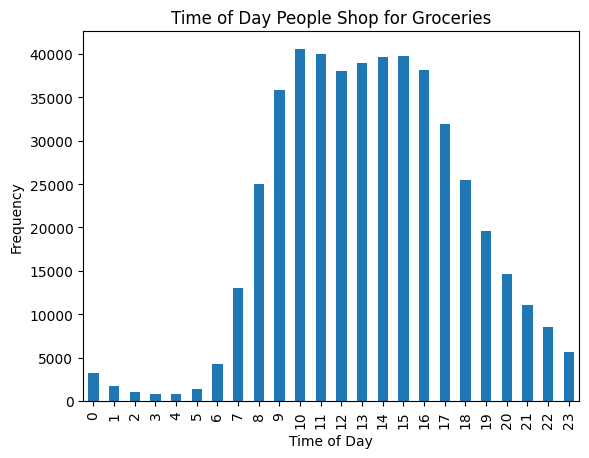

In [75]:
shopping_time.plot(
xlabel='Time of Day',
ylabel='Frequency',
kind='bar',
title='Time of Day People Shop for Groceries')
plt.show()

### What day of the week do people shop for groceries?

In [76]:
shopping_day = orders['order_dow'].value_counts().sort_index() #i did the same thing with dow and came up with Sunday
shopping_day

order_dow
0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: count, dtype: int64

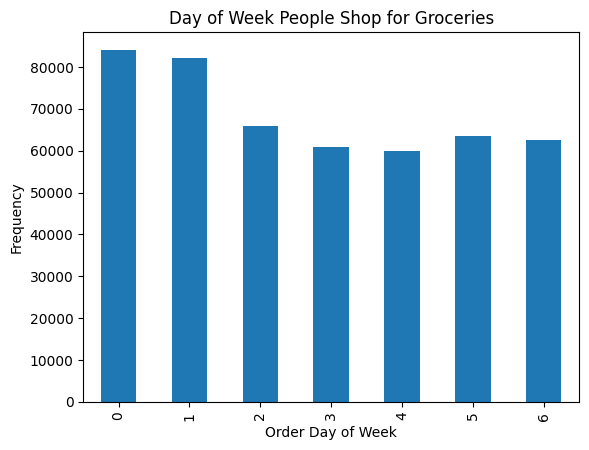

In [77]:
shopping_day.plot(
kind='bar',
xlabel='Order Day of Week',
ylabel='Frequency',
title='Day of Week People Shop for Groceries')
plt.show()

### How long do people wait until placing another order?

In [78]:
another_order = orders['days_since_prior_order'].mean() #i took the average of the days_since_prior_order column to give me an idea of when people are placing orders again
another_order

11.101750979677794

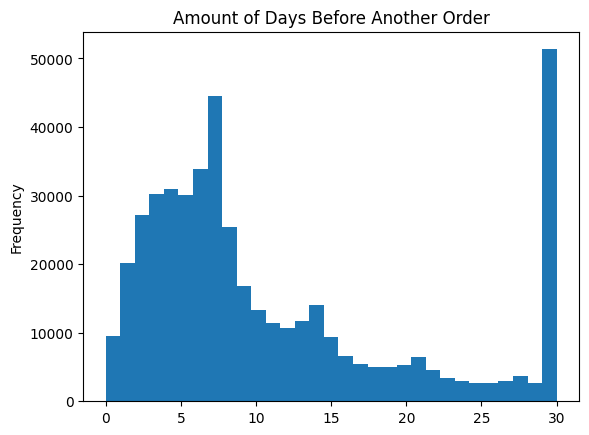

In [108]:
orders['days_since_prior_order'].plot(kind='hist',
           title='Amount of Days Before Another Order', bins=31)
plt.ylabel('Frequency')
plt.show() #according to this plot most reorders occur within 10 days

### Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays?

In [81]:
wednesday_data = orders[orders['order_dow'] == 3]['order_hour_of_day'] 
saturday_data = orders[orders['order_dow'] == 6]['order_hour_of_day']
wednesday_data.head()

6      8
16    15
28    10
30    15
35    19
Name: order_hour_of_day, dtype: int64

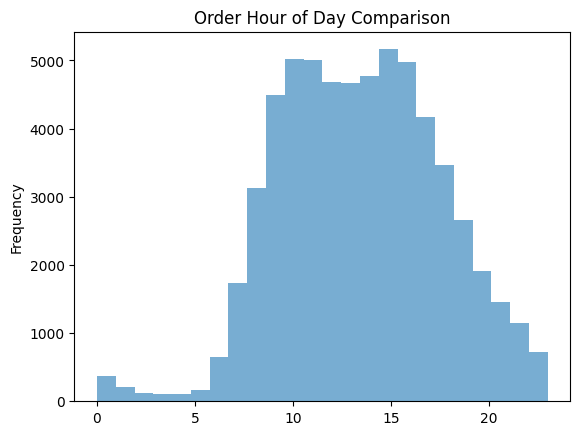

In [82]:
wednesday_data.plot(kind='hist', bins=24, alpha=0.6, title="Order Hour of Day Comparison")

plt.show() 

<Axes: ylabel='Frequency'>

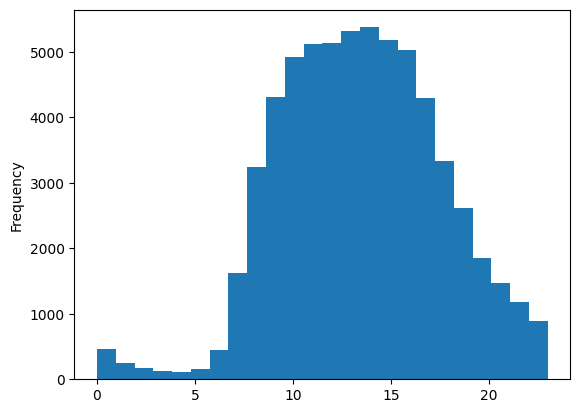

In [83]:
saturday_data.plot(kind='hist', bins=24)

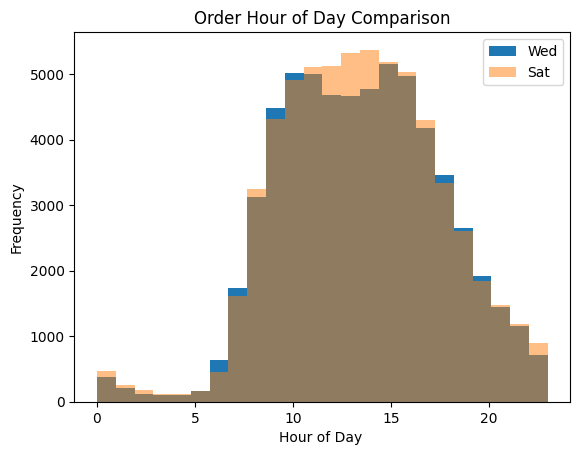

In [84]:
wednesday_data.plot(kind='hist', bins=24, title="Order Hour of Day Comparison")
saturday_data.plot(kind='hist', bins=24, alpha=0.5)
plt.legend(['Wed', 'Sat'])
plt.xlabel('Hour of Day ')
plt.show() #there doesn't look like much of a difference between wednesday and saturday except on Saturdays between 11am and 2pm.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>There's not much difference other than on Saturday's the number of shoppers tends to pick up between 11am-2pm.</b>


In [85]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30
1,1690866,163593,5,5,12,9
2,1454967,39980,4,5,19,2
3,1768857,82516,56,0,20,10
4,3007858,196724,2,4,12,17


### What's the distribution for the number of orders per customer?

In [86]:
orders_per_cust = orders.groupby('user_id').size().reset_index(name='order_count') #with this line of code i looked at seeing how many orders each customer has placed using their user_id
orders_per_cust
orders_per_cust_group = orders_per_cust.groupby('user_id')['order_count']
orders_per_cust_group

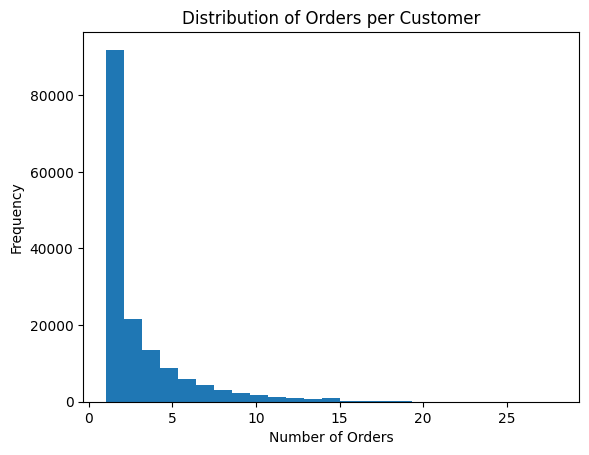

In [87]:
orders_per_cust['order_count'].plot(kind='hist', bins=25, title='Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Majority of people place 1 or maybe 2 orders</b>

### What are the top 20 popular products (display their id and name)?

In [88]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [89]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [90]:
product_count = order_products['product_id'].value_counts().reset_index() #every product has an id (product_id) and in order_products it shows how many times that product was ordered. so i took the product_id and used value_counts to see the number of occurrences
product_count.columns = ['product_id', 'count'] #then i assigned the variable columns
product_count.head(20) #and returned the top 20 items ordered

,product_id,count
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
5,47766,24689
6,47626,21495
7,16797,20018
8,26209,19690
9,27845,19600


In [91]:
top_products = product_count.merge(products[['product_id', 'product_name']], on='product_id') #i took two dfs and merged them on the product_id key. the one i just created above and the products df
top_20 = top_products.head(20) #i created a variable for top 20 so that i can just call on that variable
top_20

,product_id,count,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


### What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [92]:
reordered = order_products[order_products['reordered'] == 1] #i filtered for the reordered products using boolean
reordered_count = reordered['product_id'].value_counts().reset_index() #took the reordered_count variable and used value_coutns to total number of occurrences of each product
reordered_count.columns = ['product_id', 'reordered_count'] #created columns for the new df i just created

In [93]:
top_reordered = reordered_count.merge(products[['product_id', 'product_name']], on='product_id') #i created a variable to display top reordered items by merging the reordered_counts variable i just created and products. and i merged it on product_id

In [94]:
top_20_reordered = top_reordered.head(20) #i created a variable to give me the top 20 from the top_reordered variable
                                     

In [95]:
top_20_reordered

,product_id,reordered_count,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


### What are the top 20 items that people put in their carts first? 

In [96]:
added_first = order_products[order_products['add_to_cart_order'] == 1] #i created a variable to look at the order_products df and return me all orders that are added to the cart first

In [97]:
added_first_count = added_first['product_id'].value_counts().reset_index() #i created a variable to count the number of occurrences for each product id in the added_first variable i just created
added_first_count.columns = ['product_id', 'added_first'] #i took my added_first_count variable and assigned it columns for the df

In [98]:
top_added_first = added_first_count.merge(products[['product_id', 'product_name']], on='product_id') #i made a new variable which took the count and merged it with the products df on the product_id column

In [99]:
top_20_added_first = top_added_first.head(20) #in order to get the top 20 i created a variable which returns 20 using the .head() method

In [100]:
top_20_added_first

,product_id,added_first,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>In conclusion, from my analysis I have verified that on average Instacart shoppers shop on Wednesday around 1pm. but most people tend to show up in the mornings between 10-11am. Once a customer orders a product they tend to order again after about 1.5 weeks. Most Instacart shoppers are brand new to Instacart because the distribution tells us that shoppers majority of shoppers have only placed 1-2 orders. So we should try and figure out why the number isn't hire for shoppers who have been with Instacart past 1-2 orders. The top reordered and most popular itemss are 1. Bananas 2. Organic Bananas and 3. Organic Strawberries. If I was trying to market and bring in more traffic, I would run some sort of special on the top 10 items reordered on the weekends. Then if I had it, I would email blast the current customers of Instacart to include them in the promotion. You need to get them more involved in returning and purchasing for sure. And since Saturdays seem to be when you get a ton of traffic and Sundays are </b>